In [14]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Load your dataset
relative_path = os.path.join("data/raw", "retail_sales_dataset.csv")
df = pd.read_csv(relative_path)


* Linear regression to predict "Total Amount" based on "Age". 
    - The resulting plot shows a scatter plot of actual "Total Amount" values against "Age" and a red line representing the predicted "Total Amount" from the regression model. 
    - The R-squared is very low (-0.007), indicating a poor fit and that "Age" is not a good predictor of "Total Amount" in this dataset.

Age Mean Squared Error: 294789.2739219267
Age R-squared: -0.007037516277486722


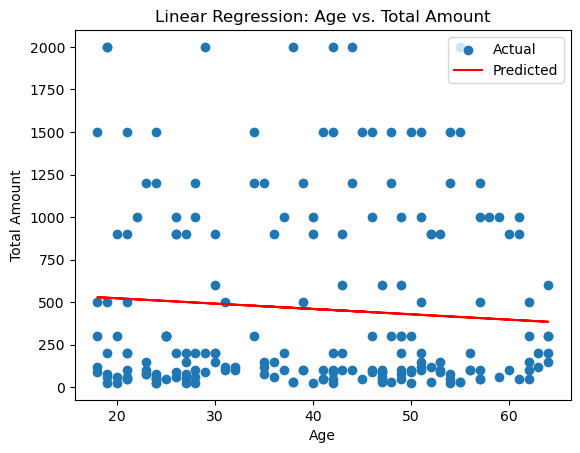

In [15]:
# Example with Age
X_age = df[['Age']]
y_age = df['Total Amount']

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

model_age = LinearRegression()
model_age.fit(X_train_age, y_train_age)

y_pred_age = model_age.predict(X_test_age)

mse_age = mean_squared_error(y_test_age, y_pred_age)
r2_age = r2_score(y_test_age, y_pred_age)

print(f"Age Mean Squared Error: {mse_age}")
print(f"Age R-squared: {r2_age}")

plt.scatter(X_test_age['Age'], y_test_age, label="Actual")
plt.plot(X_test_age['Age'], y_pred_age, color='red', label="Predicted")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.title("Linear Regression: Age vs. Total Amount")
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

 
# Preprocessing

# Separate features and target
X = df.drop('Total Amount', axis=1)
y = df['Total Amount']

# Identify categorical and numerical features
categorical_features = ['Gender', 'Product Category']
numerical_features = ['Age', 'Quantity', 'Price per Unit']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Add this line to keep other columns if needed.
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
feature_names = preprocessor.get_feature_names_out(input_features=X.columns)

# Convert to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# Add constant for statsmodels
X_processed_sm = sm.add_constant(X_processed_df)

# Fit OLS model
model = sm.OLS(y, X_processed_sm).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Amount   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     976.4
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        03:17:17   Log-Likelihood:                -6780.6
No. Observations:                1000   AIC:                         1.358e+04
Df Residuals:                     993   BIC:                         1.361e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

- Strong Prediction: The model strongly predicts "Total Amount" with an R-squared of 0.855, meaning it explains 85.5% of the variance.
- Significant Predictors: "Quantity," "Price per Unit," and "Gender" significantly influence "Total Amount" (p < 0.000). "Product Category" also shows a significant influence.
- Age Less Impactful: "Age" is not a statistically significant predictor (p = 0.107).
- Positive Relationships: "Quantity" and "Price per Unit" have a strong positive relationship with "Total Amount."
- Gender Impact: Both male and female gender have a positive impact on the total amount.
- Product Category Impact: All product categories have a positive impact on the total amount.

- Observed vs. Predicted:
    * Scatter Plot: Shows the actual "Total Amount" values (x-axis) against the predicted "Total Amount" values (y-axis).
    * Diagonal Line: Represents perfect predictions (where observed = predicted).
    * Interpretation: The points are somewhat scattered around the diagonal line, indicating the model captures some of the relationship, but there are also significant deviations, showing prediction errors. Some points are far from the line.

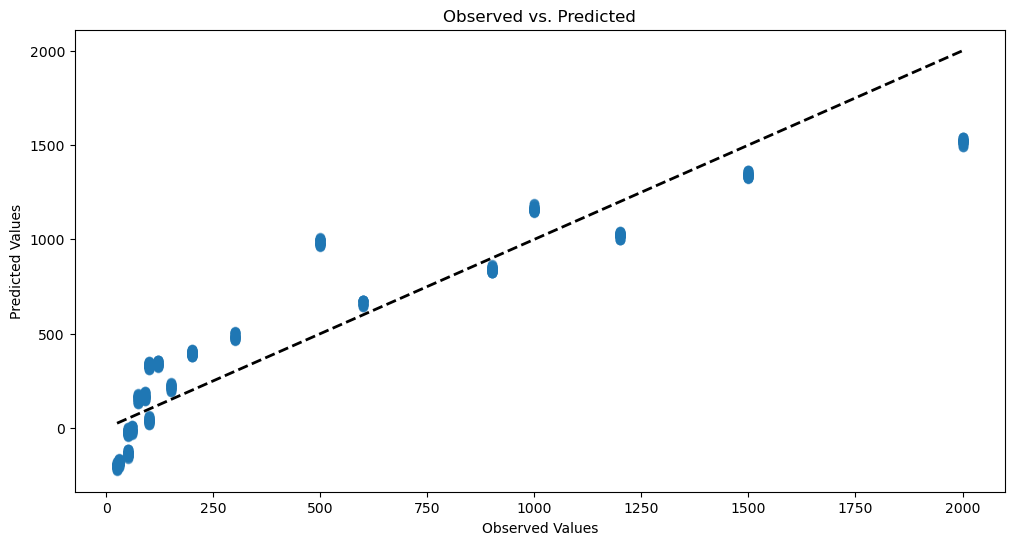

In [11]:
# Plotting Observed vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y, model.fittedvalues, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Observed vs. Predicted')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.show()


- Histogram of Residuals:
    * Distribution: Shows the distribution of the errors (residuals) between the actual and predicted values.
    * Shape: The histogram is roughly bell-shaped, but it is not perfectly symmetrical, indicating some deviation from a normal distribution.
    * Interpretation: The residuals are somewhat normally distributed, which is good, but there are some skews

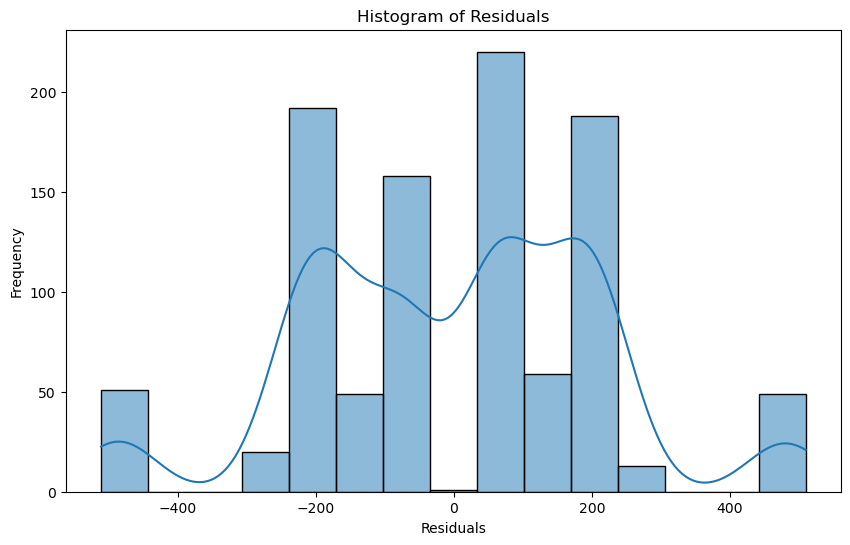

In [12]:
# Plotting Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

* QQ Plot of Residuals:
     - Quantiles: Compares the quantiles of the residuals to the quantiles of a normal distribution.
     - Diagonal Line: Represents perfect normality.
     - Interpretation: The points generally follow the diagonal line, but there are some deviations, particularly at the tails. 
     - This suggests that the residuals are reasonably close to normally distributed, but not perfectly so.

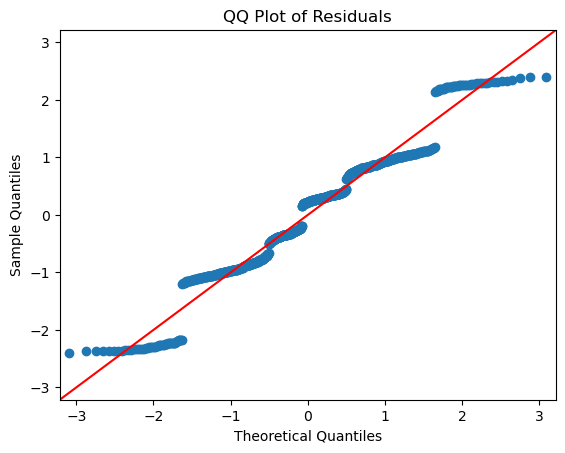

In [ ]:
# Plotting QQ Plot
sm.qqplot(model.resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()